### Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from prophet import Prophet

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### South Africa

In [2]:
SouthAfrica_dataset = pd.read_excel('SouthAfrica_Dataset.xlsx')

In [3]:
SouthAfrica_dataset.head(20)

,Country or region,Country code,ds,Bioenergy_yhat,Coal_yhat,Gas_yhat,Hydro_yhat,Solar_yhat,Wind_yhat,Emission
0,South Africa,ZAF,2000-01-01,0.45,181.67,0.00,1.34,0.00,0.00,759.709
1,South Africa,ZAF,2001-01-01,0.40,183.36,0.00,2.06,0.00,0.00,766.409
2,South Africa,ZAF,2002-01-01,0.43,188.79,0.00,2.36,0.02,0.00,761.874
3,South Africa,ZAF,2003-01-01,0.38,204.39,0.00,0.78,0.02,0.01,769.153
4,South Africa,ZAF,2004-01-01,0.36,212.63,0.00,0.94,0.02,0.01,765.116
5,South Africa,ZAF,2005-01-01,0.40,215.15,0.08,1.32,0.02,0.01,771.006
6,South Africa,ZAF,2006-01-01,0.38,223.23,0.02,2.87,0.02,0.01,774.894
7,South Africa,ZAF,2007-01-01,0.41,231.74,0.08,0.86,0.02,0.01,774.239
8,South Africa,ZAF,2008-01-01,0.43,226.11,0.08,1.19,0.02,0.02,771.902
9,South Africa,ZAF,2009-01-01,0.42,218.11,0.01,1.39,0.02,0.03,773.575


In [4]:
#Remove a column in the dataset
SouthAfrica_dataset = SouthAfrica_dataset.drop(['Emission'], axis=1)

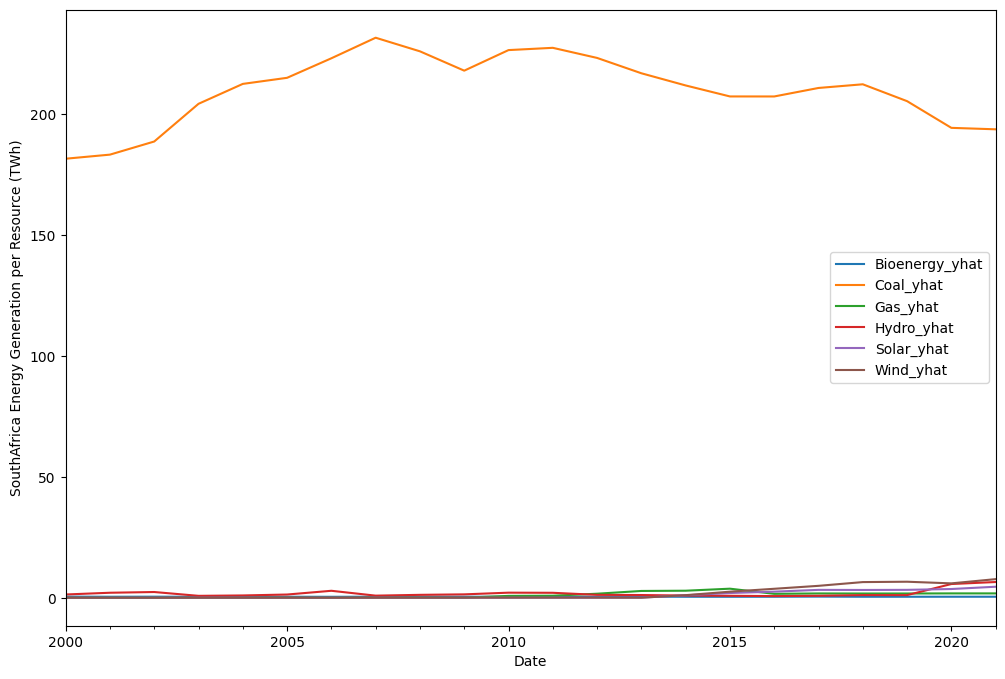

In [5]:
ax = SouthAfrica_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('SouthAfrica Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
plt.show()

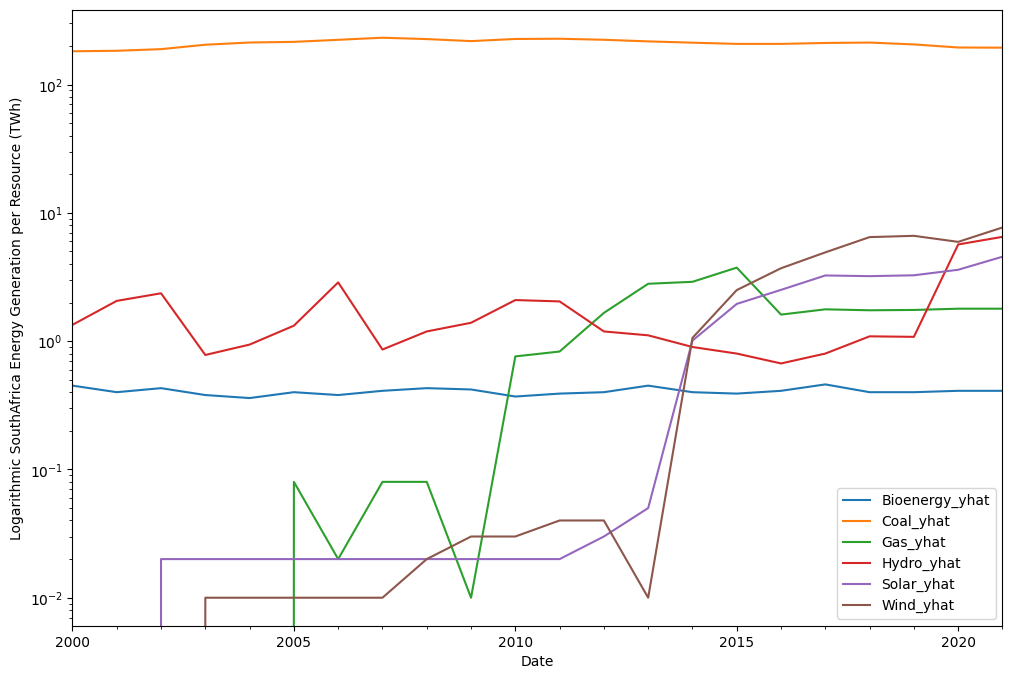

In [6]:
# Make y-axis in log scale
ax = SouthAfrica_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Logarithmic SouthAfrica Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### SouthAfrica's bioenergy

In [7]:
SouthAfrica_BioenergyModel = Prophet()

##### Model Validation


In [8]:
SouthAfrica_BioenergyValidationModel = Prophet()
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})

# Take just the first 15 rows for training
dataset_bioenergy_validation = dataset_bioenergy[:15]
SouthAfrica_BioenergyValidationModel.fit(dataset_bioenergy_validation)
future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
future_validation = pd.DataFrame({'ds': future_years_validation})
forecast_validation = SouthAfrica_BioenergyValidationModel.predict(future_validation)

17:11:17 - cmdstanpy - INFO - Chain [1] start processing
17:11:18 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
datasetX = dataset_bioenergy[15:]
forecast_validation = forecast_validation[['ds', 'yhat']]

pred = forecast_validation['yhat']
correc = datasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(correc, pred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(correc, pred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((correc - pred) / correc)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

Mean Squared Error: 0.002
Root Mean Squared Error: 0.048
Mean Absolute Percentage Error: nan


#### Model Training


In [10]:
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})
SouthAfrica_BioenergyModel.fit(dataset_bioenergy)

17:11:19 - cmdstanpy - INFO - Chain [1] start processing


17:11:19 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future_years = pd.date_range(start='2022', end='2051', freq='Y')
future = pd.DataFrame({'ds': future_years})
forecast = SouthAfrica_BioenergyModel.predict(future)

In [12]:
columns_to_load = ['ds', 'yhat']
forecasted_values =forecast.loc[:, columns_to_load]
forecasted_values = forecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
SouthAfrica_Bioenergy = pd.concat([dataset_bioenergy, forecasted_values], ignore_index=True)
SouthAfrica_Bioenergy = SouthAfrica_Bioenergy.rename(columns={'ds': 'ds', 'y': 'Bioenergy_yhat'})
SouthAfrica_Bioenergy.head(51)

,ds,Bioenergy_yhat
0,2000-01-01,0.450000
1,2001-01-01,0.400000
2,2002-01-01,0.430000
3,2003-01-01,0.380000
4,2004-01-01,0.360000
5,2005-01-01,0.400000
6,2006-01-01,0.380000
7,2007-01-01,0.410000
8,2008-01-01,0.430000
9,2009-01-01,0.420000


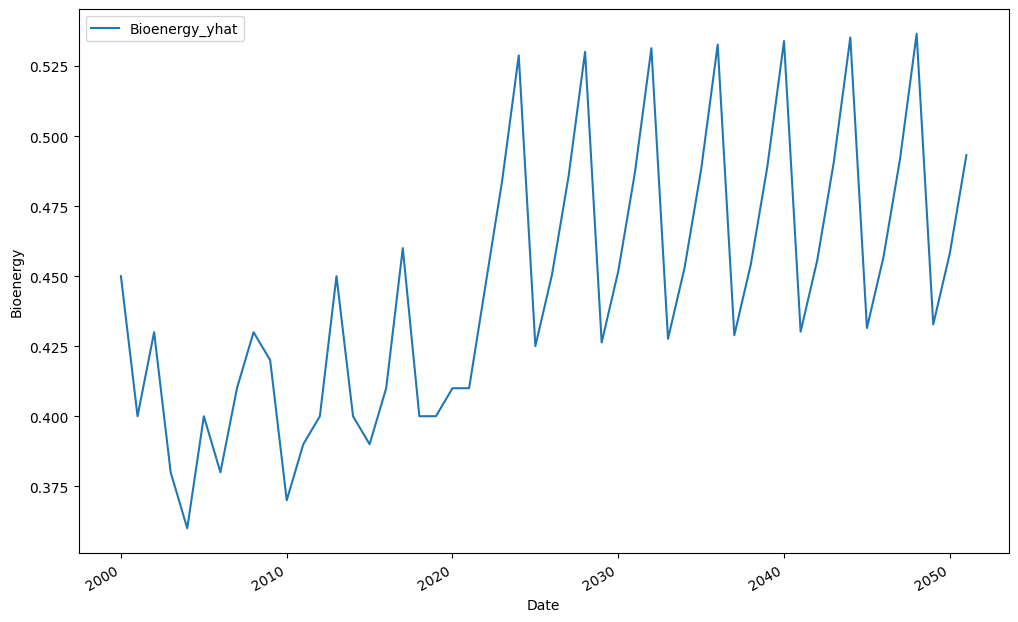

In [13]:
ax = SouthAfrica_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Bioenergy')
ax.set_xlabel('Date')
plt.show()

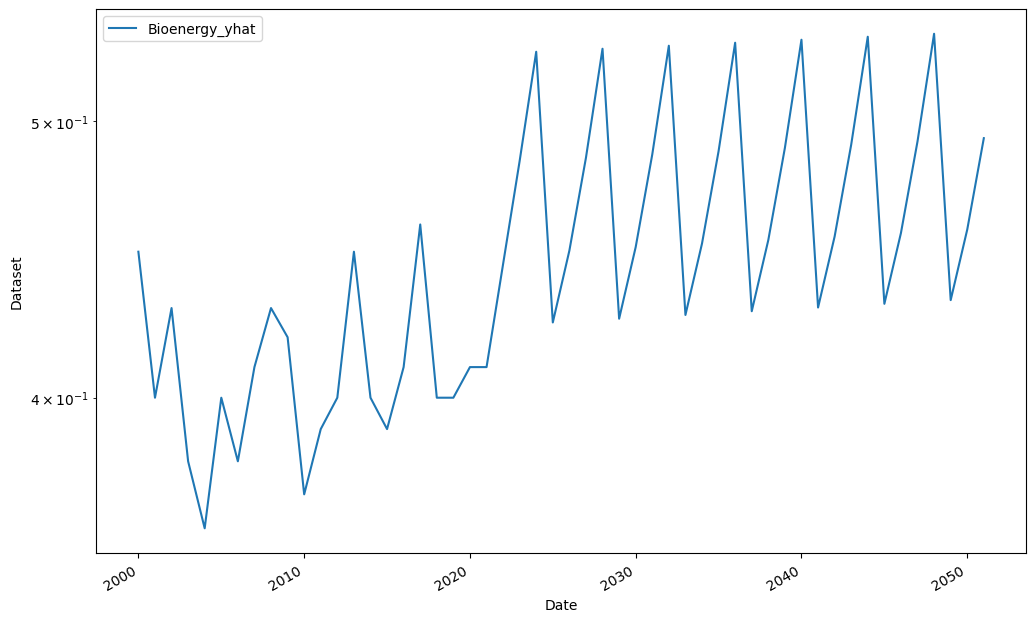

In [14]:
# Make y-axis in log scale
ax = SouthAfrica_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Dataset')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### SouthAfrica Coal Model

In [15]:
SouthAfrica_CoalModel = Prophet()

SouthAfrica_CoalValidationModel = Prophet()
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})

# Take just the first 15 rows for training
dataset_CoalValidation = dataset_Coal[:15]
SouthAfrica_CoalValidationModel.fit(dataset_CoalValidation)
Coal_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Coal_future_validation = pd.DataFrame({'ds': Coal_future_years_validation})
Coal_forecast_validation = SouthAfrica_CoalValidationModel.predict(Coal_future_validation)

CoaldatasetX = dataset_Coal[15:]
Coal_forecast_validation = Coal_forecast_validation[['ds', 'yhat']]

CoalPred = Coal_forecast_validation['yhat']
CoalCorrec = CoaldatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(CoalCorrec, CoalPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(CoalCorrec, CoalPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((CoalCorrec - CoalPred) / CoalCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:11:22 - cmdstanpy - INFO - Chain [1] start processing
17:11:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 45.186
Root Mean Squared Error: 6.722
Mean Absolute Percentage Error: nan


In [16]:
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})
SouthAfrica_CoalModel.fit(dataset_Coal)

CoalFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
CoalFuture = pd.DataFrame({'ds': CoalFuture_years})
CoalForecast = SouthAfrica_CoalModel.predict(CoalFuture)
columns_to_load = ['ds', 'yhat']
CoalForecasted_values = CoalForecast.loc[:, columns_to_load]
CoalForecasted_values = CoalForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
SouthAfrica_Coal = pd.concat([dataset_Coal, CoalForecasted_values], ignore_index=True)
SouthAfrica_Coal = SouthAfrica_Coal.rename(columns={'ds': 'ds', 'y': 'Coal_yhat'})


17:11:23 - cmdstanpy - INFO - Chain [1] start processing
17:11:24 - cmdstanpy - INFO - Chain [1] done processing


In [17]:


SouthAfrica_Coal.head(51)

,ds,Coal_yhat
0,2000-01-01,181.670000
1,2001-01-01,183.360000
2,2002-01-01,188.790000
3,2003-01-01,204.390000
4,2004-01-01,212.630000
5,2005-01-01,215.150000
6,2006-01-01,223.230000
7,2007-01-01,231.740000
8,2008-01-01,226.110000
9,2009-01-01,218.110000


#### SouthAfrica Gas 


In [18]:
SouthAfrica_GasModel = Prophet()

SouthAfrica_GasValidationModel = Prophet()
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})

# Take just the first 15 rows for training
dataset_GasValidation = dataset_Gas[:15]
SouthAfrica_GasValidationModel.fit(dataset_GasValidation)
Gas_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Gas_future_validation = pd.DataFrame({'ds': Gas_future_years_validation})
Gas_forecast_validation = SouthAfrica_GasValidationModel.predict(Gas_future_validation)

GasdatasetX = dataset_Gas[15:]
Gas_forecast_validation = Gas_forecast_validation[['ds', 'yhat']]

GasPred = Gas_forecast_validation['yhat']
GasCorrec = GasdatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(GasCorrec, GasPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(GasCorrec, GasPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((GasCorrec - GasPred) / GasCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:11:25 - cmdstanpy - INFO - Chain [1] start processing
17:11:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 1.220
Root Mean Squared Error: 1.104
Mean Absolute Percentage Error: nan


In [20]:
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})
SouthAfrica_GasModel.fit(dataset_Gas)

GasFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
GasFuture = pd.DataFrame({'ds': GasFuture_years})
GasForecast = SouthAfrica_GasModel.predict(GasFuture)
columns_to_load = ['ds', 'yhat']
GasForecasted_values = GasForecast.loc[:, columns_to_load]
GasForecasted_values = GasForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
SouthAfrica_Gas = pd.concat([dataset_Gas, GasForecasted_values], ignore_index=True)
SouthAfrica_Gas = SouthAfrica_Gas.rename(columns={'ds': 'ds', 'y': 'Gas_yhat'})

17:11:26 - cmdstanpy - INFO - Chain [1] start processing
17:11:26 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
SouthAfrica_Gas.head(51)

,ds,Gas_yhat
0,2000-01-01,0.000000
1,2001-01-01,0.000000
2,2002-01-01,0.000000
3,2003-01-01,0.000000
4,2004-01-01,0.000000
5,2005-01-01,0.080000
6,2006-01-01,0.020000
7,2007-01-01,0.080000
8,2008-01-01,0.080000
9,2009-01-01,0.010000


#### SouthAfrica Hydro

In [22]:
SouthAfrica_HydroModel = Prophet()

SouthAfrica_HydroValidationModel = Prophet()
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})

# Take just the first 15 rows for training
dataset_HydroValidation = dataset_Hydro[:15]
SouthAfrica_HydroValidationModel.fit(dataset_HydroValidation)
Hydro_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Hydro_future_validation = pd.DataFrame({'ds': Hydro_future_years_validation})
Hydro_forecast_validation = SouthAfrica_HydroValidationModel.predict(Hydro_future_validation)

HydrodatasetX = dataset_Hydro[15:]
Hydro_forecast_validation = Hydro_forecast_validation[['ds', 'yhat']]

HydroPred = Hydro_forecast_validation['yhat']
HydroCorrec = HydrodatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(HydroCorrec, HydroPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(HydroCorrec, HydroPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((HydroCorrec - HydroPred) / HydroCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:11:26 - cmdstanpy - INFO - Chain [1] start processing
17:11:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 9.765
Root Mean Squared Error: 3.125
Mean Absolute Percentage Error: nan


In [23]:
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})
SouthAfrica_HydroModel.fit(dataset_Hydro)

HydroFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
HydroFuture = pd.DataFrame({'ds': HydroFuture_years})
HydroForecast = SouthAfrica_HydroModel.predict(HydroFuture)
columns_to_load = ['ds', 'yhat']
HydroForecasted_values = HydroForecast.loc[:, columns_to_load]
HydroForecasted_values = HydroForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
SouthAfrica_Hydro = pd.concat([dataset_Hydro, HydroForecasted_values], ignore_index=True)
SouthAfrica_Hydro = SouthAfrica_Hydro.rename(columns={'ds': 'ds', 'y': 'Hydro_yhat'})

17:11:27 - cmdstanpy - INFO - Chain [1] start processing
17:11:27 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
SouthAfrica_Hydro.head(51)

,ds,Hydro_yhat
0,2000-01-01,1.340000
1,2001-01-01,2.060000
2,2002-01-01,2.360000
3,2003-01-01,0.780000
4,2004-01-01,0.940000
5,2005-01-01,1.320000
6,2006-01-01,2.870000
7,2007-01-01,0.860000
8,2008-01-01,1.190000
9,2009-01-01,1.390000


#### SouthAfrica Solar

In [25]:
SouthAfrica_SolarModel = Prophet()

SouthAfrica_SolarValidationModel = Prophet()
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})

# Take just the first 15 rows for training
dataset_SolarValidation = dataset_Solar[:15]
SouthAfrica_SolarValidationModel.fit(dataset_SolarValidation)
Solar_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Solar_future_validation = pd.DataFrame({'ds': Solar_future_years_validation})
Solar_forecast_validation = SouthAfrica_SolarValidationModel.predict(Solar_future_validation)

SolardatasetX = dataset_Solar[15:]
Solar_forecast_validation = Solar_forecast_validation[['ds', 'yhat']]

SolarPred = Solar_forecast_validation['yhat']
SolarCorrec = SolardatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(SolarCorrec, SolarPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(SolarCorrec, SolarPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((SolarCorrec - SolarPred) / SolarCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:11:28 - cmdstanpy - INFO - Chain [1] start processing
17:11:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 8.739
Root Mean Squared Error: 2.956
Mean Absolute Percentage Error: nan


In [26]:
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})
SouthAfrica_SolarModel.fit(dataset_Solar)

SolarFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
SolarFuture = pd.DataFrame({'ds': SolarFuture_years})
SolarForecast = SouthAfrica_SolarModel.predict(SolarFuture)
columns_to_load = ['ds', 'yhat']
SolarForecasted_values = SolarForecast.loc[:, columns_to_load]
SolarForecasted_values = SolarForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
SouthAfrica_Solar = pd.concat([dataset_Solar, SolarForecasted_values], ignore_index=True)
SouthAfrica_Solar = SouthAfrica_Solar.rename(columns={'ds': 'ds', 'y': 'Solar_yhat'})

17:11:28 - cmdstanpy - INFO - Chain [1] start processing
17:11:29 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
SouthAfrica_Solar.head(51)

,ds,Solar_yhat
0,2000-01-01,0.000000
1,2001-01-01,0.000000
2,2002-01-01,0.020000
3,2003-01-01,0.020000
4,2004-01-01,0.020000
5,2005-01-01,0.020000
6,2006-01-01,0.020000
7,2007-01-01,0.020000
8,2008-01-01,0.020000
9,2009-01-01,0.020000


#### SouthAfrica Wind

In [28]:
SouthAfrica_WindModel = Prophet()

SouthAfrica_WindValidationModel = Prophet()
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})

# Take just the first 15 rows for training
dataset_WindValidation = dataset_Wind[:15]
SouthAfrica_WindValidationModel.fit(dataset_WindValidation)
Wind_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Wind_future_validation = pd.DataFrame({'ds': Wind_future_years_validation})
Wind_forecast_validation = SouthAfrica_WindValidationModel.predict(Wind_future_validation)

WinddatasetX = dataset_Wind[15:]
Wind_forecast_validation = Wind_forecast_validation[['ds', 'yhat']]

WindPred = Wind_forecast_validation['yhat']
WindCorrec = WinddatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(WindCorrec, WindPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(WindCorrec, WindPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((WindCorrec - WindPred) / WindCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:11:30 - cmdstanpy - INFO - Chain [1] start processing
17:11:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 28.213
Root Mean Squared Error: 5.312
Mean Absolute Percentage Error: nan


In [29]:
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('SouthAfrica_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})
SouthAfrica_WindModel.fit(dataset_Wind)

WindFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
WindFuture = pd.DataFrame({'ds': WindFuture_years})
WindForecast = SouthAfrica_WindModel.predict(WindFuture)
columns_to_load = ['ds', 'yhat']
WindForecasted_values = WindForecast.loc[:, columns_to_load]
WindForecasted_values = WindForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
SouthAfrica_Wind = pd.concat([dataset_Wind, WindForecasted_values], ignore_index=True)
SouthAfrica_Wind = SouthAfrica_Wind.rename(columns={'ds': 'ds', 'y': 'Wind_yhat'})

17:11:31 - cmdstanpy - INFO - Chain [1] start processing
17:11:31 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
SouthAfrica_Wind.head(51)

,ds,Wind_yhat
0,2000-01-01,0.000000
1,2001-01-01,0.000000
2,2002-01-01,0.000000
3,2003-01-01,0.010000
4,2004-01-01,0.010000
5,2005-01-01,0.010000
6,2006-01-01,0.010000
7,2007-01-01,0.010000
8,2008-01-01,0.020000
9,2009-01-01,0.030000


In [31]:
FullSouthAfricaData = pd.merge(SouthAfrica_Bioenergy, SouthAfrica_Coal, on='ds')
FullSouthAfricaData = pd.merge(FullSouthAfricaData, SouthAfrica_Gas, on='ds')
FullSouthAfricaData = pd.merge(FullSouthAfricaData, SouthAfrica_Hydro, on='ds')
FullSouthAfricaData = pd.merge(FullSouthAfricaData, SouthAfrica_Solar, on='ds')
FullSouthAfricaData = pd.merge(FullSouthAfricaData, SouthAfrica_Wind, on='ds')
FullSouthAfricaData.rename(columns={'ds': 'ds', 'Bioenergy_yhat': 'Bioenergy', 'Coal_yhat': 'Coal', 'Gas_yhat': 'Gas', 'Hydro_yhat': 'Hydro', 'Solar_yhat': 'Solar', 'Wind_yhat': 'Wind'}, inplace=True)
FullSouthAfricaData.head(51)

,ds,Bioenergy,Coal,Gas,Hydro,Solar,Wind
0,2000-01-01,0.450000,181.670000,0.000000,1.340000,0.000000,0.000000
1,2001-01-01,0.400000,183.360000,0.000000,2.060000,0.000000,0.000000
2,2002-01-01,0.430000,188.790000,0.000000,2.360000,0.020000,0.000000
3,2003-01-01,0.380000,204.390000,0.000000,0.780000,0.020000,0.010000
4,2004-01-01,0.360000,212.630000,0.000000,0.940000,0.020000,0.010000
5,2005-01-01,0.400000,215.150000,0.080000,1.320000,0.020000,0.010000
6,2006-01-01,0.380000,223.230000,0.020000,2.870000,0.020000,0.010000
7,2007-01-01,0.410000,231.740000,0.080000,0.860000,0.020000,0.010000
8,2008-01-01,0.430000,226.110000,0.080000,1.190000,0.020000,0.020000
9,2009-01-01,0.420000,218.110000,0.010000,1.390000,0.020000,0.030000


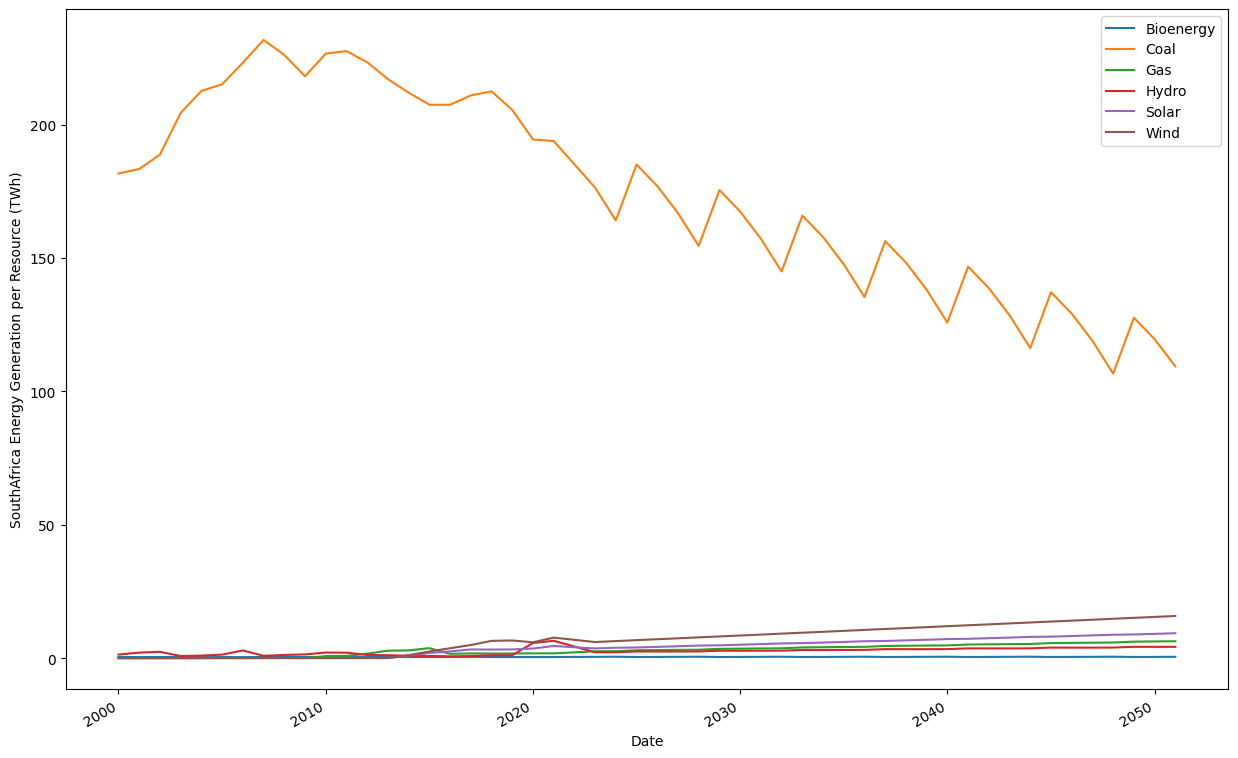

In [32]:
SouthAfricaPlot = FullSouthAfricaData.set_index('ds').plot(figsize=(15, 10))
SouthAfricaPlot.set_ylabel('SouthAfrica Energy Generation per Resource (TWh)')
SouthAfricaPlot.set_xlabel('Date')  
plt.show()

In [33]:
SouthAfrica_file_name = 'Predicted_SouthAfrica_Dataset.xlsx'
FullSouthAfricaData.to_excel(SouthAfrica_file_name, index=False)